## Author
- Sarthak Mishra 
- 22b0432 
- Assignment #4 - Cl249
- Chemical Engineering - 3rd Year

In [2]:
import numpy as np

def newton_interpolation(x_data, y_data, x):
    # We calculate the number of data points and take that to be n (degree of the resulting polynomial)
    n = len(x_data)
    coef = y_data.copy()
    
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x_data[i] - x_data[i-j])
    
    result = coef[-1]
    for i in range(n - 2, -1, -1):
        result = result * (x - x_data[i]) + coef[i]
    
    return result


# Trivial Gaussain Elimination Helper function
def gaussian_elimination(A, b):
    n = len(b)
    # Augment A with b
    Ab = np.column_stack((A, b))
    
    # Forward elimination
    for i in range(n):
        # Find pivot
        max_element = abs(Ab[i][i])
        max_row = i
        for k in range(i + 1, n):
            if abs(Ab[k][i]) > max_element:
                max_element = abs(Ab[k][i])
                max_row = k
        
        # Swap maximum row with current row
        Ab[i], Ab[max_row] = Ab[max_row], Ab[i]
        
        # Make all rows below this one 0 in current column
        for k in range(i + 1, n):
            c = -Ab[k][i] / Ab[i][i]
            for j in range(i, n + 1):
                if i == j:
                    Ab[k][j] = 0
                else:
                    Ab[k][j] += c * Ab[i][j]
    
    # Backward substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i][n] / Ab[i][i]
        for k in range(i - 1, -1, -1):
            Ab[k][n] -= Ab[k][i] * x[i]
    
    return x

def cubic_spline(x_data, y_data, x):
    n = len(x_data)
    h = np.diff(x_data)
    
    # Calculate the tridiagonal matrix A
    A = np.zeros((n, n))
    A[0, 0] = 1
    A[-1, -1] = 1
    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
    
    # Calculate the right-hand side b
    b = np.zeros(n)
    for i in range(1, n-1):
        b[i] = 3 * ((y_data[i+1] - y_data[i]) / h[i] - (y_data[i] - y_data[i-1]) / h[i-1])
    
    # Solve Ac = b using Gaussian elimination
    c = gaussian_elimination(A, b)
    
    # Find the appropriate interval
    i = np.searchsorted(x_data, x) - 1
    i = max(0, min(i, n-2))
    
    # Calculate a, b, d coefficients
    a = y_data[i]
    b = (y_data[i+1] - y_data[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3
    d = (c[i+1] - c[i]) / (3 * h[i])
    
    # Evaluate the cubic polynomial
    dx = x - x_data[i]
    return (a + b*dx + c[i]*dx**2 + d*dx**3,np.array([a,b,c[i],d]))

In [3]:
# Data for Newton's interpolation
x_newton = np.array([0, 1, 2.5, 3, 4.5, 5, 6])
y_newton = np.array([2, 5.4375, 7.3516, 7.5625, 8.4453, 9.1875, 12])

# Evaluate Newton's interpolation at x=3.5
x_eval_newton = 3.5
y_eval_newton = newton_interpolation(x_newton, y_newton, x_eval_newton)
print(f"Value at x=3.5 using Newton's polynomial: {y_eval_newton}")

# Data for cubic spline
x_spline = np.array([1, 2, 3, 5, 7, 8])
y_spline = np.array([3, 6, 19, 99, 291, 444])

# Evaluate cubic spline at x=4
x_eval_spline = 4
y_eval_spline = cubic_spline(x_spline, y_spline, x_eval_spline)[0]
print(f"Value at x=4 using cubic spline: {y_eval_spline}")

Value at x=3.5 using Newton's polynomial: 7.742162962962963
Value at x=4 using cubic spline: 48.41157205240175


### Final Answers for Both

In [4]:
import pandas as pd 

answers = pd.DataFrame(index=['Q1 - x = 3.5' , 'Q2 - x = 4'] ,columns=['Answer'], data=[y_eval_newton, y_eval_spline] )
answers

,Answer
Q1 - x = 3.5,7.742163
Q2 - x = 4,48.411572


In [5]:
coeff = pd.DataFrame(index=['Value'] , columns=[f'x{i}' for i in range(4)] , data=cubic_spline(x_spline, y_spline, x_eval_spline)[1].reshape(1,4))
coeff

,x0,x1,x2,x3
Value,19.0,20.344978,8.305677,0.760917


### Visulization

In [6]:
# Generating points for Plots
xspace_newton = np.linspace(0, 6, 100)

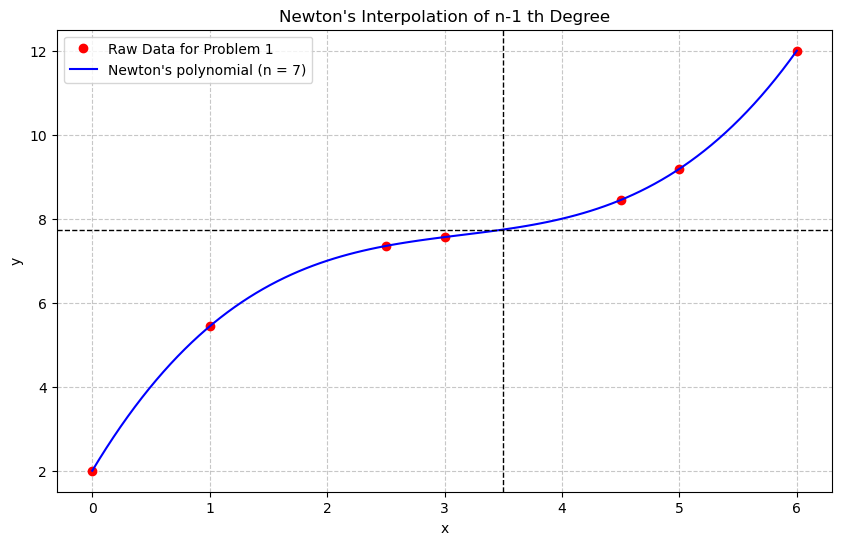

In [7]:
# Plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.grid(True, linestyle='--', alpha=0.7)
plt.plot(x_newton, y_newton, 'ro', label='Raw Data for Problem 1')
plt.plot(xspace_newton, newton_interpolation(x_newton, y_newton, xspace_newton),'b-' ,label='Newton\'s polynomial (n = 7)')
plt.axvline(x=x_eval_newton, color='k', linestyle='--', linewidth=1, ymax=1)
plt.axhline(y=y_eval_newton, color='k', linestyle='--', linewidth=1, xmax=1)

plt.title('Newton\'s Interpolation of n-1 th Degree')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

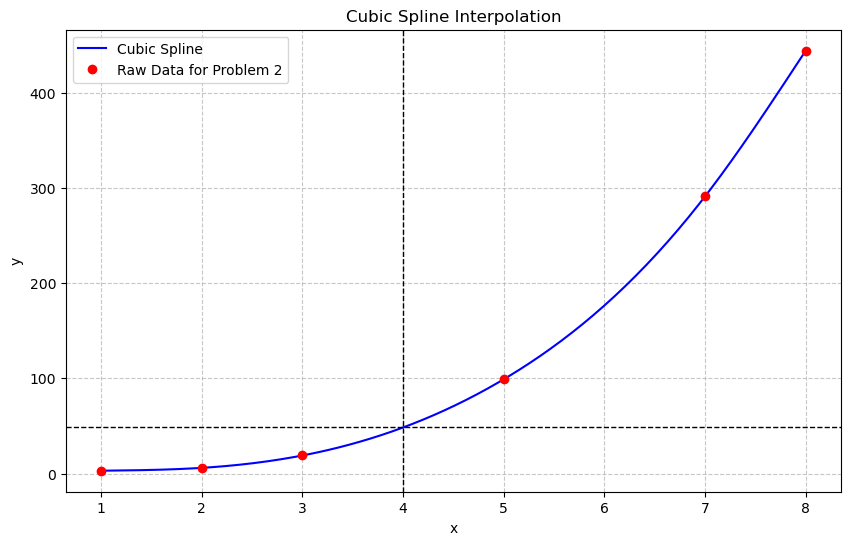

In [8]:
# Generate points for plotting the spline
x_plot = np.linspace(x_spline[0], x_spline[-1], 200)
y_plot = np.array([cubic_spline(x_spline, y_spline, x)[0] for x in x_plot])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', label='Cubic Spline')
plt.plot(x_spline, y_spline, 'ro', label='Raw Data for Problem 2')
plt.axvline(x=x_eval_spline, color='k', linestyle='--', linewidth=1, ymax=1)
plt.axhline(y=y_eval_spline, color='k', linestyle='--', linewidth=1, xmax=1)


# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()